In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip install pyreadstat
# !pip install --upgrade pandas

### 키에 관한 데이터

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heights.csv')
df.head(10)
df.tail()

,height,weight
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47
199,71.39,127.88


In [ ]:
# 독립변수
x = df['height']
# 종속변수
y = df['weight']

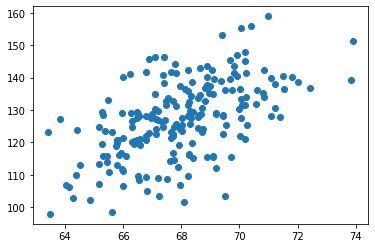

In [ ]:
plt.scatter(x,y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height', ylabel='weight'>

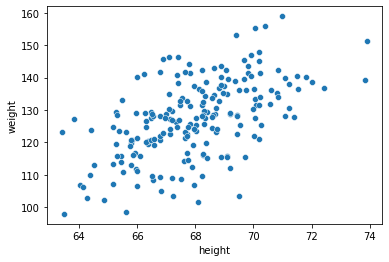

In [ ]:
sns.scatterplot(x,y)

In [ ]:
model = LinearRegression()

In [ ]:
df.shape

(200, 2)

In [ ]:
x.shape

(200,)

In [ ]:
y.shape

(200,)

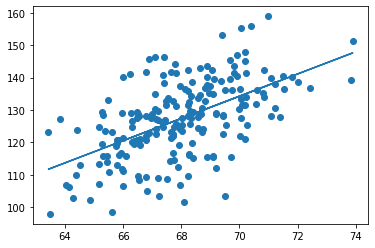

In [ ]:
# x: train / y: target
# 알맞게 형변환(2차원 형태)
x1 = x.values.reshape(-1,1)
# 학습
model.fit(x1,y)
# 예측값
plt.scatter(x,y)
plt.plot(x, model.predict(x1))

In [ ]:
# 예측치 출력
model.predict([[68]])                                   

array([127.39427034])

###

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/manhattan.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


### 'rent'(임대료), 'bedrooms'(침실), 'bathrooms'(욕실), 'size_sqft'(평수feet),'min_to_subway'(지하철 거리), 'floor'(층수), 'building_age_yrs'(건물 년식), 'no_fee'(수수료), 'has_roofdeck'(옥상), 'has_washer_dryer'(세탁기/건조기), 'has_doorman'(도어맨), 'has_elevator'(엘리베이터), 'has_dishwasher'(식기세척기), 'has_patio'(안마당), 'has_gym'(헬스장), 'neighborhood'(이웃), 'borough'(자치구)

In [ ]:
df2[df2['rent']>=19000]

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
822,8807,20000,3.0,3,2600,2,3.0,86,0,1,0,1,1,1,0,1,Soho,Manhattan
1024,3176,20000,2.0,2,2200,2,2.0,5,0,1,1,1,1,0,0,1,Tribeca,Manhattan
1076,8692,20000,4.0,4,2160,1,18.0,9,0,0,1,0,1,0,0,0,Upper East Side,Manhattan
1101,2048,19950,2.0,2,2750,5,10.0,11,0,0,0,0,1,0,0,1,West Village,Manhattan
1453,313,20000,3.0,3,2783,0,35.0,2,0,0,0,0,0,0,0,0,Flatiron,Manhattan
1641,10865,19950,4.0,3,2302,6,20.0,2,0,0,0,0,0,0,0,0,Gramercy Park,Manhattan
1959,1665,19000,2.0,2,1728,2,21.0,2,0,0,0,0,0,0,0,0,Midtown,Manhattan
2154,7146,20000,3.0,2,2376,0,23.0,2,0,0,0,0,0,0,0,0,Flatiron,Manhattan
2670,2414,19000,2.0,2,1441,8,16.0,7,0,0,1,0,0,0,1,0,West Village,Manhattan
2715,6482,20000,3.0,3,2500,9,83.0,15,0,0,0,1,0,0,0,0,Midtown East,Manhattan


In [ ]:
df2.sort_values('rent',ascending=False).head(20)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
822,8807,20000,3.0,3,2600,2,3.0,86,0,1,0,1,1,1,0,1,Soho,Manhattan
3406,3120,20000,4.0,4,2870,1,27.0,89,0,0,0,0,0,0,0,0,Tribeca,Manhattan
1453,313,20000,3.0,3,2783,0,35.0,2,0,0,0,0,0,0,0,0,Flatiron,Manhattan
2715,6482,20000,3.0,3,2500,9,83.0,15,0,0,0,1,0,0,0,0,Midtown East,Manhattan
1076,8692,20000,4.0,4,2160,1,18.0,9,0,0,1,0,1,0,0,0,Upper East Side,Manhattan
1024,3176,20000,2.0,2,2200,2,2.0,5,0,1,1,1,1,0,0,1,Tribeca,Manhattan
2154,7146,20000,3.0,2,2376,0,23.0,2,0,0,0,0,0,0,0,0,Flatiron,Manhattan
3281,1672,20000,3.0,3,2400,10,57.0,27,0,1,0,0,1,0,0,0,Midtown East,Manhattan
1101,2048,19950,2.0,2,2750,5,10.0,11,0,0,0,0,1,0,0,1,West Village,Manhattan
1641,10865,19950,4.0,3,2302,6,20.0,2,0,0,0,0,0,0,0,0,Gramercy Park,Manhattan


In [ ]:
df2.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [ ]:
# an: 회귀계수, b:bias
# y = b +a1x1 + a2x2 +a3x3 ... + anxn

from sklearn.model_selection import train_test_split
# 예측값 지정
target = df2[['rent']]
# 불필요한 데이터 제거
train = df2.drop(['rental_id','rent','neighborhood','borough'],axis = 1)

# 특정모델에 과적합 하지 않도록 데이터를 나눔
x_train, x_test, y_train, y_test = \
    train_test_split(train, target, train_size=0.8, test_size=0.2)


In [ ]:
model = LinearRegression()
# 모델링함
model.fit(x_train.values, y_train.values)
my_predict = [[2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0]]
# 예측값
model.predict(my_predict)

array([[10360.91348036]])

Text(0, 0.5, 'predict')

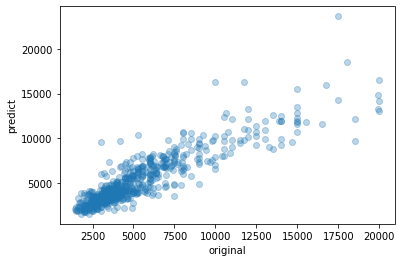

In [ ]:
# 정답에 대한 예측률
y_predict = model.predict(x_test.values)
plt.scatter(y_test, y_predict, alpha=0.3)
plt.xlabel('original')
plt.ylabel('predict')


In [ ]:
train.head()

,rental_id,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,1545,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2472,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,2919,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,2790,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,3946,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


In [ ]:
x_train.values

array([[1.139e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [3.788e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.510e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.105e+03, 0.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [2.899e+03, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.556e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])